Lambda School Data Science

*Unit 1, Sprint 4, Module 4*

---

# CLUSTERING ASSIGNMENT

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [0]:
# import the libraries, pandas, numpy, matplotlib, sklearn, pca, k means,standard scalar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

In [0]:
# label and read in the .csv file.
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
# show the data frame shape.
print(df.shape)
# show the data frame with headers.
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
# remove the 'diagnosis' label.
df1 = df.drop('diagnosis', axis=1)
# drop the 'diagnosis' column and the 'Unnamed: 32' column full of NAN's.
df1 = df1.drop(columns=['Unnamed: 32'])
# show the data frame with headers.
df1.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Cleaning, HeatMap, PCA, Clustering.

# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

In [0]:
# import seaborn library.
import seaborn as sns

In [0]:
# label and create a heat map using 'red' for color, cmap=True.
hm = sns.light_palette("red", as_cmap=True)
# create a correlation matrix of the data set.
corr_matrix = df1.corr()
# show the 'correlation' matrix with 'background_gradient', set cmap to 'hm'.
corr_matrix.style.background_gradient(cmap=hm)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1,0.0746265,0.0997699,0.0731594,0.0968928,-0.0129682,9.57011e-05,0.05008,0.0441581,-0.0221141,-0.0525114,0.143048,-0.00752619,0.137331,0.177742,0.0967806,0.033961,0.0552393,0.0787681,-0.0173063,0.0257253,0.0824053,0.0647195,0.0799859,0.107187,0.010338,-0.0029681,0.0232027,0.0351736,-0.0442243,-0.0298656
radius_mean,0.0746265,1,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.67909,-0.0973174,0.674172,0.735864,-0.2226,0.206,0.194204,0.376169,-0.104321,-0.0426413,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.00706589
texture_mean,0.0997699,0.323782,1,0.329533,0.321086,-0.0233885,0.236702,0.302418,0.293464,0.071401,-0.0764372,0.275869,0.386358,0.281673,0.259845,0.00661378,0.191975,0.143293,0.163851,0.00912717,0.0544575,0.352573,0.912045,0.35804,0.343546,0.0775034,0.27783,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.0731594,0.997855,0.329533,1,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.0867611,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.0816293,-0.00552339,0.969476,0.303038,0.970387,0.94155,0.150549,0.455774,0.563879,0.771241,0.189115,0.0510185
area_mean,0.0968928,0.987357,0.321086,0.986507,1,0.177028,0.498502,0.685983,0.823269,0.151293,-0.28311,0.732562,-0.0662802,0.726628,0.800086,-0.166777,0.212583,0.20766,0.37232,-0.0724966,-0.019887,0.962746,0.287489,0.95912,0.959213,0.123523,0.39041,0.512606,0.722017,0.14357,0.0037376
smoothness_mean,-0.0129682,0.170581,-0.0233885,0.207278,0.177028,1,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.0684064,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.21312,0.0360718,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,9.57011e-05,0.506124,0.236702,0.556936,0.498502,0.659123,1,0.883121,0.831135,0.602641,0.565369,0.497473,0.0462048,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.59021,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.05008,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1,0.921391,0.500667,0.336783,0.631925,0.0762183,0.660391,0.617427,0.0985637,0.670279,0.69127,0.68326,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.51493
concave points_mean,0.0441581,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1,0.462497,0.166917,0.69805,0.0214796,0.71065,0.690299,0.0276533,0.490424,0.439167,0.615634,0.0953508,0.257584,0.830318,0.292752,0.855923,0.80963,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.0221141,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1,0.479921,0.303379,0.128053,0.313893,0.22397,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.0906507,0.219169,0.177193,0.426675,0.4732,0.433721,0.430297,0.699826,0.438413


In [0]:
# import numpy, array and sklearn.decompostion, pca.
from numpy import array 
from sklearn.decomposition import PCA

In [0]:
# label, standardize, and fit the data with 'StandardScalar().fit_transform()'.
X = StandardScaler().fit_transform(df1)

In [0]:
# use 'PCA' principal component analysis of the standardized data.

# 1st pca with '0' to start, allows us to see how many components to choose.
pca = PCA()
# label and 'fit' the 'standardized' data with the 'pca'.
p_components = pca.fit(X)
# label and transform the data.
B = p_components.transform(X)
# show the 'explained variance ratio' with '.explained_variance_ratio_'.
print("Explained Variance Ratio = \n", B.shape, p_components.explained_variance_ratio_)

Explained Variance Ratio = 
 (569, 31) [4.28647013e-01 1.83767915e-01 9.14643564e-02 6.39147476e-02
 5.31875905e-02 3.98281519e-02 3.15572013e-02 2.16694506e-02
 1.48642719e-02 1.30042934e-02 1.12630637e-02 9.48033657e-03
 8.42409435e-03 7.78484562e-03 5.06366610e-03 3.03640406e-03
 2.57451447e-03 1.90471846e-03 1.69649015e-03 1.58457831e-03
 1.00228336e-03 9.65845343e-04 8.84855607e-04 7.82226523e-04
 5.81914867e-04 4.99346119e-04 2.63603188e-04 2.22519447e-04
 5.12689531e-05 2.41411630e-05 4.29161956e-06]


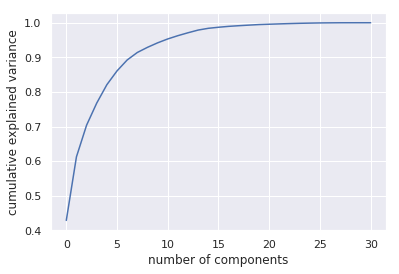

In [0]:
# plot the full range of number of components.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# label the x axis.
plt.xlabel('number of components')
# label the y axis.
plt.ylabel('cumulative explained variance');

In [0]:
# use 'PCA' principal component analysis of the standardized data.

# 2nd pca with '9' components.
pca = PCA(9)
# label and 'fit' the 'standardized' data with the 'pca'.
p_components = pca.fit(X)
# label and transform the data.
B = p_components.transform(X)
# show the 'explained variance ratio' with '.explained_variance_ratio_'.
print("Explained Variance Ratio = \n", B.shape, p_components.explained_variance_ratio_)

Explained Variance Ratio = 
 (569, 9) [0.42864701 0.18376792 0.09146436 0.06391475 0.05318759 0.03982815
 0.0315572  0.02166945 0.01486427]


In [0]:
# import sklearn.cluster, kmeans, sklearn metrics, scipy.spatial.distance cdist, numpy, matplotlib.pyplot.
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

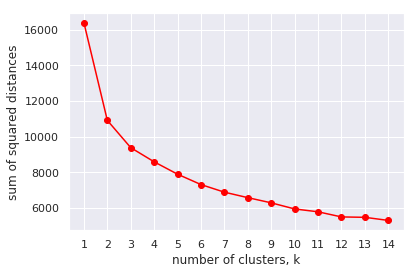

In [0]:
# create and label a set range for 'ks'.
ks = range(1, 15)
# create a 'sum_of_sq_distances' list.
sum_of_sq_distances = []
# create a 'for' loop.
for k in ks:
    # label and create a 'kmeans' clusters model.
    model = KMeans(n_clusters=k)
    # fit the model to 'B' samples.
    model.fit(B)
    # 'append' the inertia to the 'sum_of_sq_differences'.
    sum_of_sq_distances.append(model.inertia_)
# plot the ks range, 'sum_of_sq_differences', use '-o' t show dots and lines, color= red.     
plt.plot(ks, sum_of_sq_distances, '-o', color='red')
# label the x axis.
plt.xlabel('number of clusters, k')
# label the y axis.
plt.ylabel('sum of squared distances')
# show the x tick marks on the 'ks' data.
plt.xticks(ks)
plt.show()

In [0]:
# label and create 'kmeans' data with '3' clusters.
kmeans = KMeans(n_clusters=3)
# fit the 'B' data the the kmeans.
kmeans.fit(B)
# create the 'y' kmeans using .predict on the 'B' data.
y_kmeans = kmeans.predict(B)
# create labels using the 'kmeans' data.
labels = kmeans.labels_

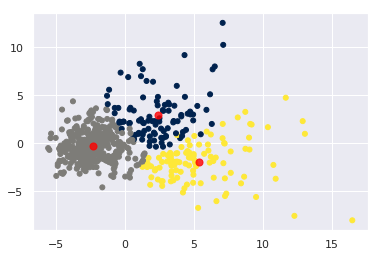

In [0]:
# create a scatter plot of the 'B' data
plt.scatter(B[:, 0], B[:, 1], c=y_kmeans, s=25, cmap='cividis');
# create and label the centers for the clusters with .cluster_centers_.
centers = kmeans.cluster_centers_
# add the 'center points' for the clusters.
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.8);

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.

In [0]:
# create labels using the 'kmeans' data.
labels = kmeans.labels_
# create 'series' with the 'labels'.
new_series = pd.Series(labels)
# add a new column for the 'clusters' with 'new_series'.values.
df1['clusters'] = new_series.values
# show the data frame with headers.
df1.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2


In [0]:
# create a new data frame for 'id' & 'diagnosis' from the original data set.
df2 = df[['id', 'diagnosis']]

In [0]:
# merge the df1 data frame with the df2 data frame.
df1_merged = pd.merge(df1, df2, on='id')
df1_merged['diagnosis'] = df1_merged['diagnosis'].replace({'M': 1, 'B': 0})
# show the data frame with headers.
df1_merged.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2,1


In [0]:
# !pip install scikit-plot.
!pip install scikit-plot

In [0]:
# import scikitplot.
import scikitplot as skplt

/usr/local/lib/python3.6/dist-packages/scikitplot/metrics.py:124: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


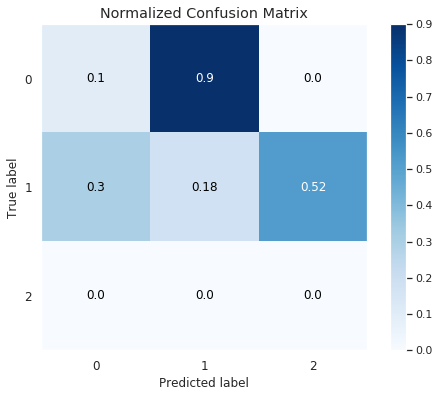

In [0]:
# create a confusion matrix for the 'diagnosis' and 'clusters' data.
skplt.metrics.plot_confusion_matrix(df1_merged['diagnosis'], df1_merged['clusters'], figsize=(8,6), normalize=True)
plt.show()